<a href="https://colab.research.google.com/github/Mansi-pradhan/2510310_MansiPradhan/blob/main/Workshop2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [7]:
# Problem1
# 1
import pandas as pd
df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Copy of Copy of bank.csv")
df

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,yes
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,yes
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,no


In [8]:
# 2
df.info()
# Finding  data with dtype object
object_cols = df.select_dtypes(include=[object]).columns
print(object_cols)
#Unique values
for col in object_cols:
  print(df[col].unique())
# Null Values in each col
print(df.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB
Index(['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact',
       'month', 'pou

In [9]:
#3
bank_numeric = df.drop(columns=df.select_dtypes(include='object').columns)
bank_numeric.to_csv("banknumericdata.csv", index = False)
print("Saved as banknumericdata.csv")
print(bank_numeric)
#summary statistics
bank_numeric.describe()

Saved as banknumericdata.csv
       age  balance  day  duration  campaign  pdays  previous
0       58     2143    5       261         1     -1         0
1       44       29    5       151         1     -1         0
2       33        2    5        76         1     -1         0
3       47     1506    5        92         1     -1         0
4       33        1    5       198         1     -1         0
...    ...      ...  ...       ...       ...    ...       ...
45206   51      825   17       977         3     -1         0
45207   71     1729   17       456         2     -1         0
45208   72     5715   17      1127         5    184         3
45209   57      668   17       508         4     -1         0
45210   37     2971   17       361         2    188        11

[45211 rows x 7 columns]


,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


In [11]:
#Problem 2
import pandas as pd
df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Copy of medical_students_dataset.csv")
print(df)
df.info()
#Empty columns
df.isnull().sum()

#Filling missing values using different technique

# 1. Age
# Median is used because it is robust to outliers and better represents the center for skewed data.
df['Age'] = df['Age'].fillna(df['Age'].median())

# 2. Gender
# Gender is a categorical nominal variable (no order).
# Mode (most frequent category) is used to fill missing values logically.
df['Gender'] = df['Gender'].fillna(df['Gender'].mode()[0])

# 3. Height
# Height is numeric and usually normally distributed.
# Mean is used because it accurately represents the average in a normal distribution.
df['Height'] = df['Height'].fillna(df['Height'].mean())


# 4. Weight
# Weight is numeric but can have outliers.
# Median is used to avoid influence from extreme values.
df['Weight'] = df['Weight'].fillna(df['Weight'].median())

# 5. Blood Type
# Blood Type is categorical nominal (no order).
# Mode is used as the most common blood type is a reasonable guess for missing values.
df['Blood Type'] = df['Blood Type'].fillna(df['Blood Type'].mode()[0])

# 6. BMI
# BMI is numeric and derived from height and weight, usually fairly normal.
# Mean is used to fill missing values because it represents the average BMI well.
df['BMI'] = df['BMI'].fillna(df['BMI'].mean())

# 7. Temperature
# Temperature is numeric and physiological data that can be sequential.
# Forward fill (ffill) is used because the previous reading is a reasonable estimate.
df['Temperature'] = df['Temperature'].ffill()

# 8. Heart Rate
# Heart Rate is also sequential physiological data.
# Forward fill is used for the same reason as temperature.
df['Heart Rate'] = df['Heart Rate'].ffill()

# 9. Blood Pressure
# Blood Pressure is numeric and may have outliers.
# Median is used to avoid distortion from extreme values.
df['Blood Pressure'] = df['Blood Pressure'].fillna(df['Blood Pressure'].median())

# 10. Cholesterol
# Cholesterol is numeric and generally normally distributed.
# Mean is used to replace missing values, representing the average well.
df['Cholesterol'] = df['Cholesterol'].fillna(df['Cholesterol'].mean())

# 11. Diabetes
# Diabetes is categorical binary (Yes/No).
# Mode is used because the most frequent category is a reasonable guess.
df['Diabetes'] = df['Diabetes'].fillna(df['Diabetes'].mode()[0])

# 12. Smoking
# Smoking is categorical binary (Yes/No).
# Mode is used for the same reason as Diabetes.
df['Smoking'] = df['Smoking'].fillna(df['Smoking'].mode()[0])

        Student ID   Age  Gender      Height     Weight Blood Type        BMI  \
0              1.0  18.0  Female  161.777924  72.354947          O  27.645835   
1              2.0   NaN    Male  152.069157  47.630941          B        NaN   
2              3.0  32.0  Female  182.537664  55.741083          A  16.729017   
3              NaN  30.0    Male  182.112867  63.332207          B  19.096042   
4              5.0  23.0  Female         NaN  46.234173          O        NaN   
...            ...   ...     ...         ...        ...        ...        ...   
199995         NaN  24.0    Male  176.503260  95.756997          B  30.737254   
199996     99997.0  29.0  Female  163.917675  45.225194        NaN  16.831734   
199997     99998.0  34.0  Female         NaN  99.648914        NaN  33.189303   
199998     99999.0  30.0  Female  156.446944  50.142824          A  20.486823   
199999    100000.0  20.0  Female  153.927409  99.928405          O  42.175189   

        Temperature  Heart 

In [12]:
# Check total number of duplicate rows
duplicate_count = df.duplicated().sum()
print("Number of duplicate rows:", duplicate_count)

#remove duplicates
df = df.drop_duplicates()

Number of duplicate rows: 12804


In [14]:
import pandas as pd

df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Copy of Titanic-Dataset.csv')

#making subset for dataframe for specific columns
subset_df = df[['Name','Pclass','Sex','Age','Fare','Survived']]
print(subset_df)

#filter row with pclass = 1
first_class_df = subset_df[subset_df['Pclass'] == 1]

#calculate the staticstic for the fare
fare_mean = first_class_df['Fare'].mean()
fare_median = first_class_df['Fare'].median()
fare_min = first_class_df['Fare'].min()
fare_max = first_class_df['Fare'].max()

print("Fare Statistics for First-Class Passengers:")
print("Mean:", fare_mean)
print("Median:", fare_median)
print("Maximum:", fare_max)
print("Minimum:", fare_min)

# Count missing values in the 'Age' column
age_null_count = first_class_df['Age'].isnull().sum()
print("Number of null values in 'Age':", age_null_count)
# Drop rows where 'Age' is null
first_class_df = first_class_df.dropna(subset=['Age'])
print("Number of null values in 'Age' after dropping:", first_class_df['Age'].isnull().sum())

#checking unique values in embarked
print(df['Embarked'].unique())
# Convert 'Embarked' into separate binary columns
embarked_dummies = pd.get_dummies(df['Embarked'], prefix='Embarked')

# Join these dummy columns back to the original DataFrame
df = pd.concat([df, embarked_dummies], axis=1)


# Step 4: Drop the original 'Embarked' column
df = df.drop('Embarked', axis=1)

# Step 5: Print first few rows to verify changes
print(df.head())

# Group by 'Sex' and calculate mean of 'Survived'
survival_by_sex = df.groupby('Sex')['Survived'].mean()
print(survival_by_sex)


                                                  Name  Pclass     Sex   Age  \
0                              Braund, Mr. Owen Harris       3    male  22.0   
1    Cumings, Mrs. John Bradley (Florence Briggs Th...       1  female  38.0   
2                               Heikkinen, Miss. Laina       3  female  26.0   
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)       1  female  35.0   
4                             Allen, Mr. William Henry       3    male  35.0   
..                                                 ...     ...     ...   ...   
886                              Montvila, Rev. Juozas       2    male  27.0   
887                       Graham, Miss. Margaret Edith       1  female  19.0   
888           Johnston, Miss. Catherine Helen "Carrie"       3  female   NaN   
889                              Behr, Mr. Karl Howell       1    male  26.0   
890                                Dooley, Mr. Patrick       3    male  32.0   

        Fare  Survived  
0     7.2500  

   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S  
<c

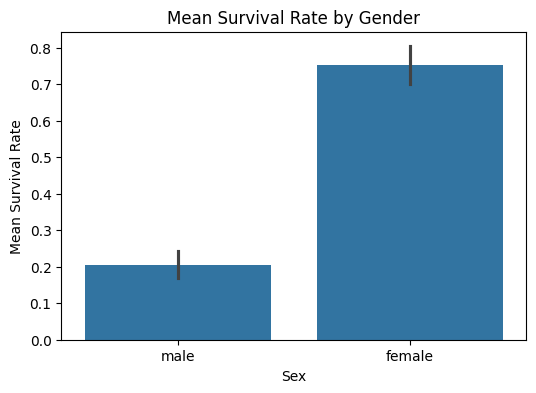

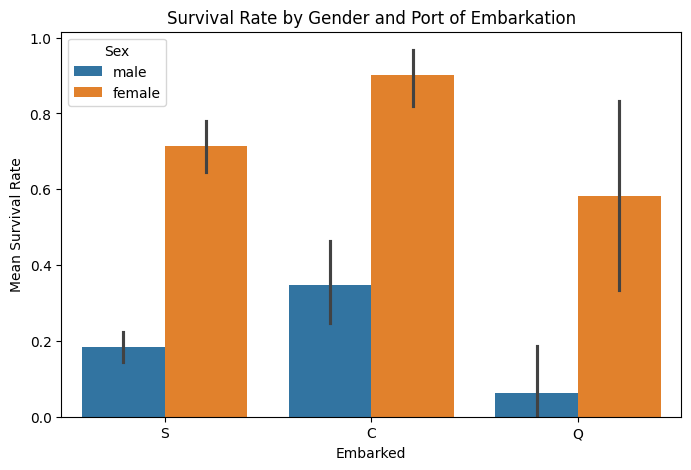

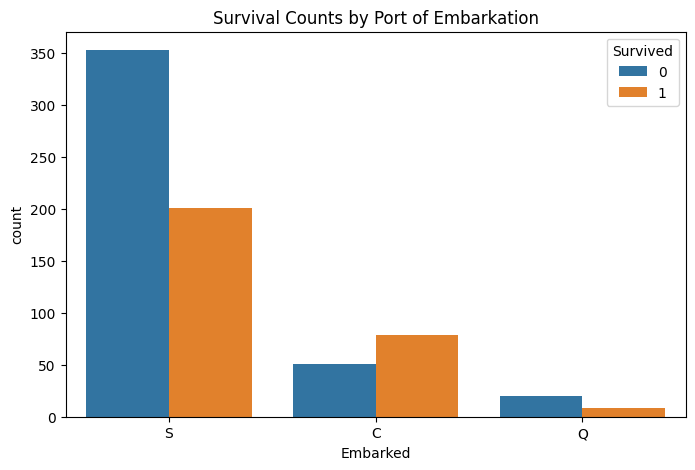

In [16]:
#Problem 5
# ----------------------------
# Titanic Data Cleaning & Visualization
# ----------------------------

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Step 1: Load the dataset
df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Copy of Titanic-Dataset.csv")

# Step 2: Optional – inspect the dataset
print(df.head())
print(df.info())
print(df['Embarked'].unique())

# Step 3: Drop rows with missing 'Embarked' (if any)
df = df.dropna(subset=['Embarked'])

# Step 4: One-hot encoding of 'Embarked' (optional)
embarked_dummies = pd.get_dummies(df['Embarked'], prefix='Embarked')
df = pd.concat([df, embarked_dummies], axis=1)

# Step 5: Check missing values in 'Age' and drop if needed
print("Missing Age values:", df['Age'].isnull().sum())
df = df.dropna(subset=['Age'])  # only keep rows with Age

# Step 6: Visualize survival rate by gender
plt.figure(figsize=(6,4))
sns.barplot(x='Sex', y='Survived', data=df)
plt.title("Mean Survival Rate by Gender")
plt.ylabel("Mean Survival Rate")
plt.show()

# Step 7: Visualize survival rate by gender AND port of embarkation
plt.figure(figsize=(8,5))
sns.barplot(x='Embarked', y='Survived', hue='Sex', data=df)
plt.title("Survival Rate by Gender and Port of Embarkation")
plt.ylabel("Mean Survival Rate")
plt.show()

# Step 8: Optional – count plot for absolute numbers
plt.figure(figsize=(8,5))
sns.countplot(x='Embarked', hue='Survived', data=df)
plt.title("Survival Counts by Port of Embarkation")
plt.show()